In [13]:
# ------------------  set up logging ----------------------
import logging
from auditory_cortex.utils import set_up_logging
set_up_logging('info')

import numpy as np
import matplotlib.pyplot as plt
from auditory_cortex.neural_data import create_neural_dataset
%matplotlib inline

def plot_zero_sequences(session_id, bin_width = 50, figsize=(10, 6)):
    
    dataset_name = 'ucdavis'
    dataset = create_neural_dataset(dataset_name, session_id)
    print(f"Number of repeats: {dataset.num_repeats}")
    all_zero_sequences = {}
    total_presentations = {}
    all_codes = dataset.assigned_units
    for mVocs in [False, True]:
        exp_type = 'TIMIT' if not mVocs else 'mVocs'
        all_zero_sequences[exp_type] = {}
        total_presentations[exp_type] = {}
        for repeated in [False, True]:
            stim_type = 'unique' if not repeated else 'repeated'
            all_zero_sequences[exp_type][stim_type] = {}
            spikes = dataset.extract_spikes(bin_width=bin_width, repeated=repeated, mVocs=mVocs)
            zero_sequences = {code: 0 for code in all_codes}
            
            num_repeats = 1 if not repeated else dataset.num_repeats
            total_presentations[exp_type][stim_type] = len(spikes)*num_repeats
            for stim_id in spikes:
                for code in all_codes:
                    zero_trials = 0
                    tr_spikes = spikes[stim_id][code]
                    if tr_spikes.ndim > 0: # repeated data
                        for tr in range(tr_spikes.shape[0]):
                            if np.count_nonzero(tr_spikes[tr]) ==0:
                                zero_trials += 1

                    else:   # unique trials
                        if np.count_nonzero(tr_spikes)==0:
                            zero_trials = 1
                    zero_sequences[code] += zero_trials
            all_zero_sequences[exp_type][stim_type] = zero_sequences

    # plotting...
    fig, ax = plt.subplots(2, 2, figsize=figsize)
    fig.subplots_adjust(wspace=0.25, hspace=0.4)  # ⬅️ Adjust spacing between subplots
    for ii, (exp_type, data_dict) in enumerate(all_zero_sequences.items()):
        for jj, (stim_type, zero_seq_dict) in enumerate(data_dict.items()):
            total_trials = total_presentations[exp_type][stim_type]
            list_a = np.array(list(zero_seq_dict.keys())).astype(str)
            list_b = list(zero_seq_dict.values()) 
            ax[ii, jj].bar(list_a, list_b)
            ax[ii, jj].axhline(total_trials, color='red', linestyle='--', label='Total trials')
            ax[ii, jj].set_xlabel('SUA/MUA codes')
            ax[ii, jj].set_ylabel('Trials')
            ax[ii, jj].set_title(f"{exp_type}, {stim_type} trials")

    plt.suptitle(f"session ID: {dataset.session_id}, bin width: {bin_width} ms")
    

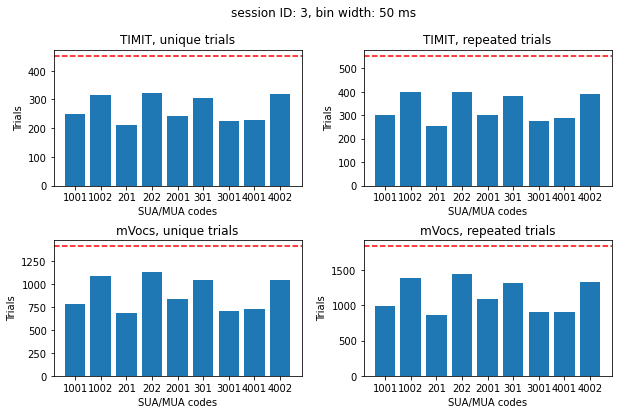

In [4]:
plot_zero_sequences(3)

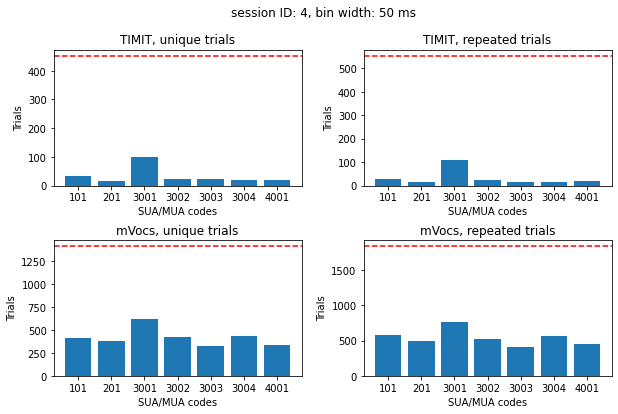

In [5]:
plot_zero_sequences(4)

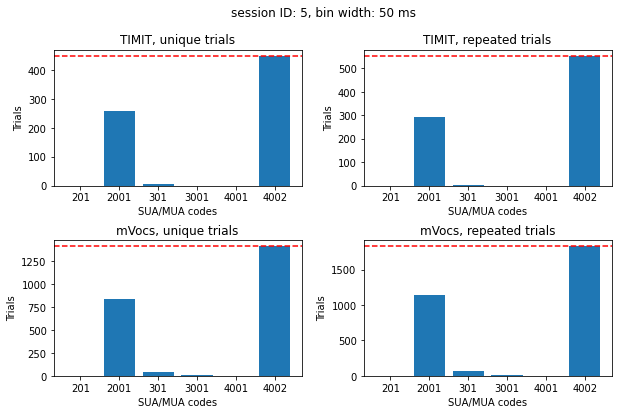

In [6]:
plot_zero_sequences(5)

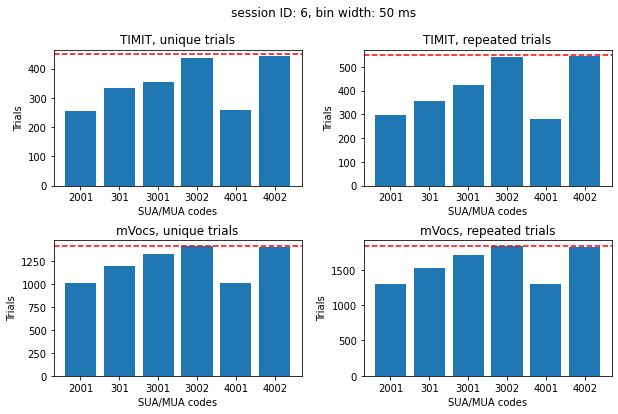

In [10]:
plot_zero_sequences(6)

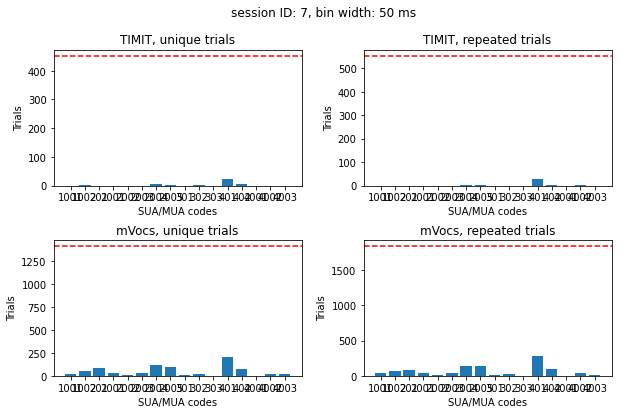

In [7]:
plot_zero_sequences(7)

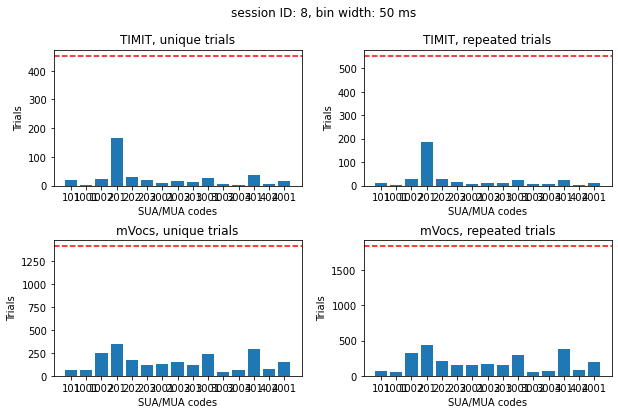

In [8]:
plot_zero_sequences(8)

Number of repeates: 3


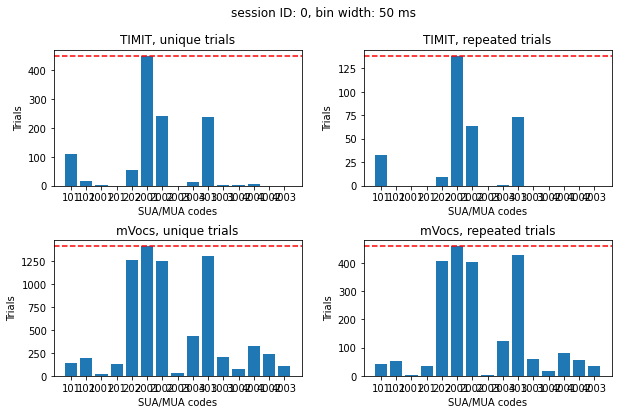

In [12]:
plot_zero_sequences(0)

Number of repeats: 3


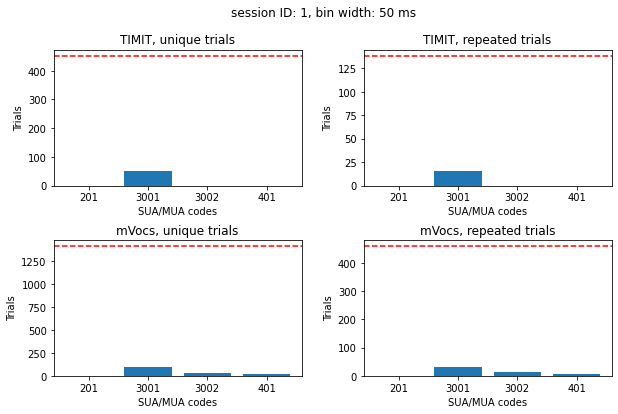

In [14]:
plot_zero_sequences(1)

Number of repeats: 3


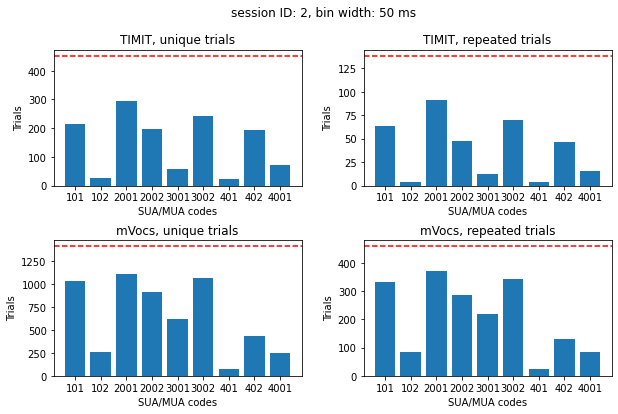

In [15]:
plot_zero_sequences(2)

### spike histograms